In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("classData.csv")
df.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [11]:
df.info() #as shown below there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [29]:
df['Fault_Code'] = df['G'].apply(str) + df['C'].apply(str) +df['B'].apply(str) + df['A'].apply(str) #To create a code to distinguish fault type

In [44]:
df[df['Fault_Code'] == '0000'] #to verify that our new column output is as expected

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Code
5496,0,0,0,0,61.806321,-22.861987,21.102428,0.366320,-0.567179,0.200859,0000
5497,0,0,0,0,48.041678,-23.401108,21.273066,0.367341,-0.564257,0.196916,0000
5498,0,0,0,0,34.256533,-23.909263,21.408047,0.368258,-0.561168,0.192910,0000
5499,0,0,0,0,20.464350,-24.396165,21.501503,0.369086,-0.557916,0.188830,0000
5500,0,0,0,0,7.109677,-25.075888,21.341967,0.370321,-0.554505,0.184184,0000
...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0000
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0000
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0000
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0000


In [45]:
fault_class = []
for value in df.Fault_Code.values:
    if value == '1111' or value == '0111':
        fault_class.append('3 phase fault')
    if value == '1001' or value == '1010' or value == '1100' :
        fault_class.append('single phase to ground fault')
    if value == '1011' or value == '1110' or value == '1101' :
        fault_class.append('double phase to ground fault')
    if value == '0011' or value == '0110' or value == '0101' :
        fault_class.append('double phase fault')
    if value == '0000':
        fault_class.append('no fault')

In [47]:
len(fault_class)

7861

In [49]:
df['fault_class'] = fault_class

In [53]:
df.iloc[5000:5500, :]

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Code,fault_class
5000,1,1,1,1,883.607328,-439.319890,-444.289702,0.019758,-0.042281,0.022523,1111,3 phase fault
5001,1,1,1,1,883.449285,-427.221988,-456.229560,0.020343,-0.042300,0.021957,1111,3 phase fault
5002,1,1,1,1,883.073272,-415.018734,-468.056801,0.020924,-0.042310,0.021385,1111,3 phase fault
5003,1,1,1,1,882.479381,-402.713139,-479.768506,0.021500,-0.042309,0.020809,1111,3 phase fault
5004,1,1,1,1,881.667761,-390.308238,-491.361786,0.022070,-0.042297,0.020227,1111,3 phase fault
...,...,...,...,...,...,...,...,...,...,...,...,...
5495,1,1,1,1,75.540847,-22.278939,20.903750,0.365181,-0.569928,0.204747,1111,3 phase fault
5496,0,0,0,0,61.806321,-22.861987,21.102428,0.366320,-0.567179,0.200859,0000,no fault
5497,0,0,0,0,48.041678,-23.401108,21.273066,0.367341,-0.564257,0.196916,0000,no fault
5498,0,0,0,0,34.256533,-23.909263,21.408047,0.368258,-0.561168,0.192910,0000,no fault


In [56]:
df.drop(columns = ['G', 'C', 'B', 'A'], axis = 1, inplace = True) #dropping the first 4 columns since they are already utilized

In [119]:
df['fault_class'].value_counts()/7861

no fault                        0.300852
3 phase fault                   0.283552
double phase to ground fault    0.144256
single phase to ground fault    0.143620
double phase fault              0.127719
Name: fault_class, dtype: float64

In [120]:
 df = df[df.fault_class != 'no fault']#dropping the rows where the fault class shows that there is no fualt

In [122]:
df['fault_class'].value_counts()/len(df['fault_class']) #percentage of each type of fault

3 phase fault                   0.405568
double phase to ground fault    0.206332
single phase to ground fault    0.205422
double phase fault              0.182678
Name: fault_class, dtype: float64

<AxesSubplot:>

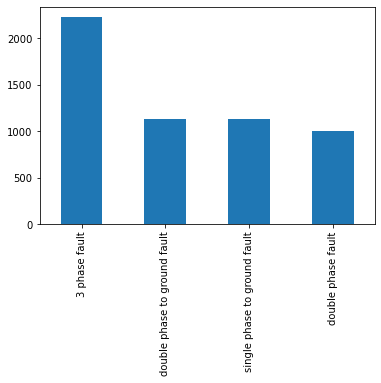

In [133]:
df['fault_class'].value_counts().plot(kind='bar')

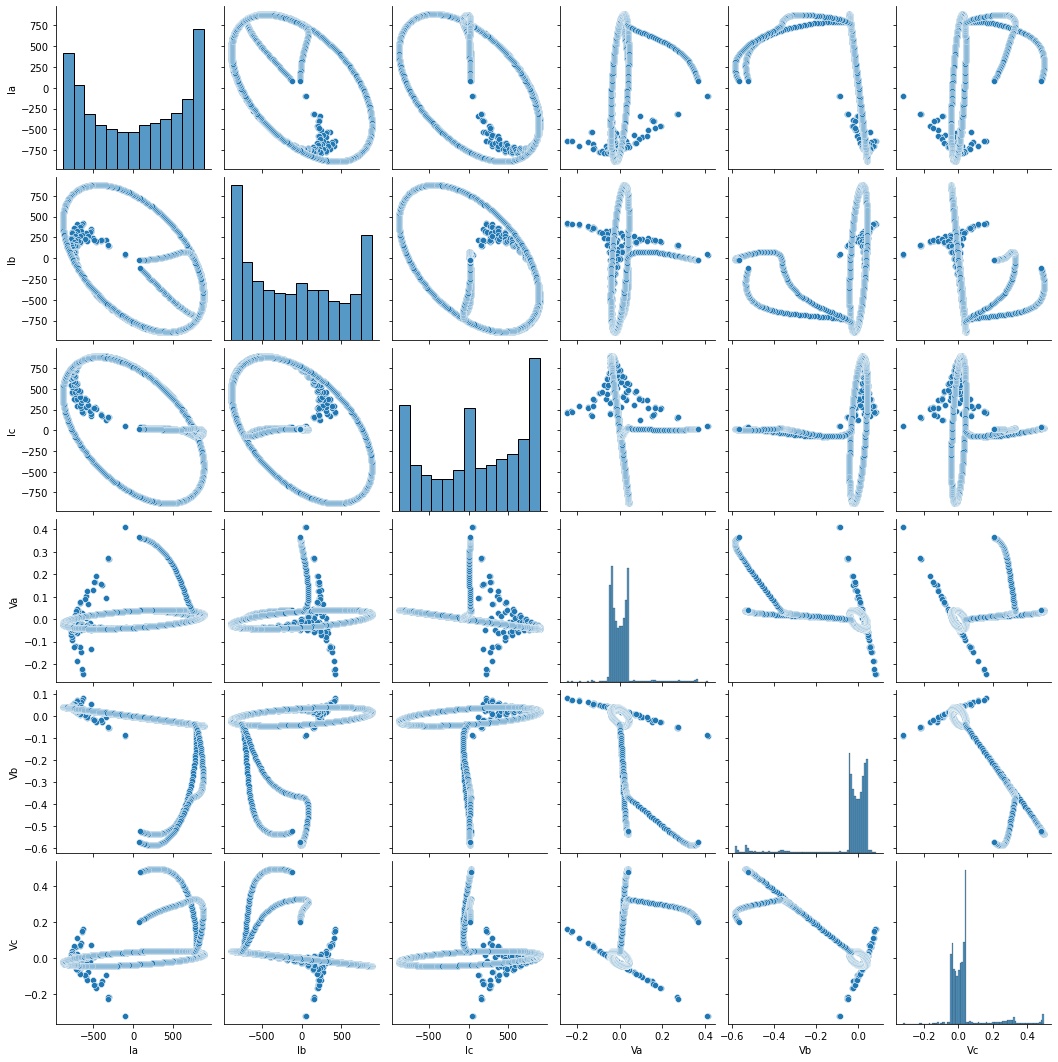

In [163]:
sns.pairplot(df[df['fault_class'] == '3 phase fault'])

In [149]:
df_LG = df[df['fault_class']=='single phase to ground fault']

In [159]:
df_LG.groupby('Fault_Code')['Fault_Code'].count()

Fault_Code
1001    1129
Name: Fault_Code, dtype: int64

In [161]:
df_LLG = df[df['fault_class']=='double phase to ground fault']
df_LLG.groupby('Fault_Code')['Fault_Code'].count()

Fault_Code
1011    1134
Name: Fault_Code, dtype: int64

In [162]:
df_LLG = df[df['fault_class']=='double phase fault']
df_LLG.groupby('Fault_Code')['Fault_Code'].count()

Fault_Code
0110    1004
Name: Fault_Code, dtype: int64

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [128]:
X = df.iloc[:, :-2]
y = df.iloc[:, -1]

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train) #bulding ML algorithem for fault detecting

DecisionTreeClassifier()

In [130]:
y_pred = clf.predict(X_test) #prediction of new set

In [72]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [131]:
A = accuracy_score(y_test, y_pred)
R = recall_score(y_test, y_pred, average='weighted')
P = precision_score(y_test, y_pred, average='weighted')
F1 = f1_score(y_test, y_pred, average = 'weighted')

In [132]:
print(f'Model accurecy is {A} \nModel recall score {R} \nModel precision is {P} \nModel F1 score is {F1}')

Model accurecy is 0.9954545454545455 
Model recall score 0.9954545454545455 
Model precision is 0.9954749685798073 
Model F1 score is 0.9954472411978643
